In [1]:
from array import *

import pandas as pd
import numpy as np

df_seed_privacy_policies = pd.read_csv('data/imitation+privacy-policy.csv', header=None)

# df_seed_privacy_policies

In [2]:
import networkx as nx
from networkx import *
import random

In [3]:
# Initialize

seed_user_count = 24
simulation_user_count = 100
simulation_steps = 1000


In [4]:
seed = random.seed(10)
k = 10 # Each node is joined with its k nearest neighbors in a ring topology
rewiring_p = 0.05 # The probability of rewiring each edge

In [5]:
G = nx.watts_strogatz_graph(simulation_user_count, k, rewiring_p, seed)

# List nodes and edges
# print("Nodes:", list(G.nodes()))
# print("Edges:", list(G.edges()))

relations_types = 4

# assigning relationships

for u,v in G.edges():
    r = random.randint(1,relations_types)
    G[u][v]['relation'] = r

In [6]:
# for u,v in G.edges(2):
#     print(u, v)
    
# len(G.edges(1))

def tag_connections(simulation_user_id):
    limit = random.randint(1,3)
    tagged_users = []
    for u,v in G.edges(simulation_user_id):
        if random.randint(0,100) < (limit* 100)/(len(G.edges(simulation_user_id))):
            tagged_users.append(v)
        if len(tagged_users) == limit: 
            break
    return(tagged_users)        

In [7]:
def get_user_policy(simulation_user_id, context, df_seed_privacy_policies):
    seed_user_count = len(df_seed_privacy_policies.index)
    mapped_seed_user_id = simulation_user_id%seed_user_count
    policy = int(df_seed_privacy_policies.loc[[mapped_seed_user_id]][context*2-2])
    imitation_attitude = int(df_seed_privacy_policies.loc[[mapped_seed_user_id]][context*2-1])
    return(policy,imitation_attitude)

# print(get_user_policy(25, 3, df_seed_privacy_policies))

In [8]:
# df_adj = pd.read_csv('data/adjacency.csv', header=None, index_col=False)
#df_adj = pd.DataFrame(np.loadtxt('data/adjacency.csv', dtype=int))
#df_adj

In [9]:
# print(get_user_policy(25, 3, df_seed_privacy_policies))
# print(get_user_policy(25, 3, df_seed_privacy_policies)[0])

In [49]:
def get_reward(simulation_user_id, context, tagged_users):
    reward = 0
    simulation_user_policy = get_user_policy(simulation_user_id, context, df_seed_privacy_policies)
#     print(simulation_user_policy[0])

    for tagged_user_id in tagged_users:
        tagged_user_policy = get_user_policy(tagged_user_id, context, df_seed_privacy_policies)
#         print(tagged_user_policy[0])
        policy_diff = simulation_user_policy[0] - tagged_user_policy[0]
        current_reward = 1 - 0.5 * abs(policy_diff)
        reward = reward + current_reward
    
    return(reward)  

# temp_tagged_users = [2,3]
# temp_tagged_users.append(2)
# temp_tagged_users.append(3)
# print(get_reward(1,9,temp_tagged_users))

In [11]:
# Movement initialize
move_prob_init = 25
contexts_count = 16

In [19]:
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid")

In [52]:
!pip install progress
from progress.bar import Bar

  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9614 sha256=d354df6c29592923d71f71ed8dd0a4348ca65f5954d0d19d97a5b3d932e4263c
  Stored in directory: /home/vf20401/.cache/pip/wheels/bb/01/5a/c916509df9b12c6465864251dbe826def8e31a16fa7da54f08
Successfully built progress


In [53]:
agentlocations = []
agentpolicies = []

initlocation = []
initpolicy = []

column_names = ['step', 'id', 'context', 'policy','tags','reward']
df_context_policies  = pd.DataFrame(columns = column_names)
df_context_policies


# Set initial locations for each user and set a policy 

for a in range(0,seed_user_count):
    #print(a)
    context = random.randint(1,contexts_count)
    #initlocation.insert(a, location)
    #print(int(df.loc[[a]][initlocation[a]*2-2]))
    policy = int(df_seed_privacy_policies.loc[[a]][context*2-2])
    #initpolicy.insert(a, int(df.loc[[a]][location*2-2]))
    #currentlocations.append(location)
    #currentpolicies.append(int(df.loc[[a]][location*2-2]))
    
    tagged_users = tag_connections(a)
    reward = get_reward(a, context, tagged_users)
    
    df_context_policies.loc[len(df_context_policies)] = [0, a, context, policy, tagged_users, reward]
    
#print(initlocation)    
#print(initpolicy)    

#agentlocations.append(initlocation)
#agentpolicies.append(initpolicy)

bar = Bar('Processing', max=simulation_steps)

for t in range(1, simulation_steps):
    #currentlocations = agentlocations[t-1]
    #currentpolicies = agentpolicies[t-1]
    for a in range(0,seed_user_count):
        moveprob = random.randint(1,100)
        if moveprob < move_prob_init:
            context = random.randint(1,contexts_count)
            policy = int(df_seed_privacy_policies.loc[[a]][context*2-2])
        else:
            index = a + (t-1)*seed_user_count
            context = df_context_policies.loc[index]['context']
            #context = df_context_policies.loc[(df_context_policies['step'] == t-1) & (df_context_policies['id'] == a)]['context']
            policy = df_context_policies.loc[index]['policy']
            #policy = df_context_policies.loc[(df_context_policies['step'] == t-1) & (df_context_policies['id'] == a)]['policy']

        tagged_users = tag_connections(a)
        reward = get_reward(a, context, tagged_users)

        df_context_policies.loc[len(df_context_policies)] = [t, a, context, policy, tagged_users, reward]
            
        #currentsharingpolicies[]
    bar.next()

    #print("\n Current:", currentlocations)
    #agentlocations.append(currentlocations)
    #print("\n All: ", agentlocations)
    
    #agentpolicies.append(currentpolicies)
bar.finish()
    
# #print("Locations", agentlocations)
# #print("Policies", agentpolicies)



# df_locations=pd.DataFrame(data=agentlocations)
# #print("\n\n", agentlocations)
# #print(df_locations)

df_context_policies

,step,id,context,policy,tags,reward
0,0,0,3,2,"[2, 98, 4]",2.0
1,0,1,11,1,[],0.0
2,0,2,10,3,"[3, 97]",0.0
3,0,3,3,1,[99],1.0
4,0,4,16,1,[],0.0
...,...,...,...,...,...,...
23995,999,19,16,1,[],0.0
23996,999,20,7,3,"[16, 15]",0.5
23997,999,21,9,4,[46],1.0
23998,999,22,9,4,[],0.0


In [51]:
# Test reward function

# print(get_reward(21, 6, [26,46]))

# print(get_user_policy(21, 6, df_seed_privacy_policies), get_user_policy(25, 6, df_seed_privacy_policies))

0.5
(1, 2) (4, 2)


# Fixed Policy

[Text(0.5, 1.0, 'Fixed Policy')]

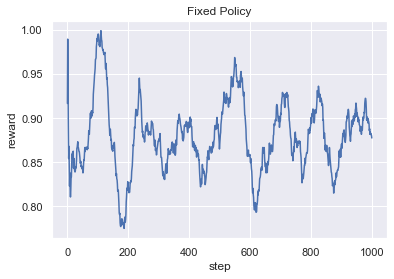

In [57]:
sns.lineplot(x="step", y="reward",
             data=df_context_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean()).set(title='Fixed Policy')

In [58]:
df_context_policies.describe()

,reward
count,24000.000000
mean,0.880146
std,0.899937
min,-1.500000
25%,0.000000
50%,1.000000
75%,1.500000
max,3.000000


## Generating CSVs for Fixed Policy Reward

In [62]:
# Test rolling
# df = pd.DataFrame({'B': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})
# df.rolling(3, min_periods=1).mean()

# Generate CSV: Mean for each step
# df_context_policies.groupby(['step']).mean().to_csv('data/fixed-reward.csv')

# Generate CSV: Mean for each step followed by computing a rolling mean over 50 steps
df_context_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean().to_csv('data/fixed-reward-rolling-s10-v3.csv')

# Identity Imitating

In [75]:
# Test for a given context
# context_id = 18
# print(df_context_policies[0:100].groupby(['context', 'policy']).mean().reset_index().query('context == @context_id').sort_values(by=['reward'], ascending=False).iloc[0]['policy'])


def get_identity_policy(simulation_user_id, context, step):
#     df_context_policies[0, step*100].groupby(['context', 'policy']).mean()
#     if step > 100 and len(df_identity_policies[0:(step-1)*100].query('id in @connections').groupby(['context', 'identitypolicy']).mean().reset_index().query('context == @context')) > 1:
#         return(int(df_identity_policies[0:(step-1)*100].query('id in @connections').groupby(['context', 'identitypolicy']).mean().reset_index().query('context == @context').sort_values(by=['identityreward'], ascending=False).iloc[0]['identitypolicy']))
    if len(df_context_policies[0:(step-1)*100].groupby(['context', 'policy']).mean().reset_index().query('context == @context')) > 1:
        return(int(df_context_policies[0:(step-1)*100].groupby(['context', 'policy']).mean().reset_index().query('context == @context').sort_values(by=['reward'], ascending=False).iloc[0]['policy']))
    else:
        return(get_user_policy(simulation_user_id, context, df_seed_privacy_policies)[0])

In [76]:
def get_identity_reward(simulation_user_id, context, tagged_users, step):
    reward = 0
    simulation_user_policy = get_identity_policy(simulation_user_id, context, step)
#     print(simulation_user_policy[0])

    for tagged_user_id in tagged_users:
        tagged_user_policy = get_identity_policy(tagged_user_id, context, step)
#         print(tagged_user_policy[0])
        policy_diff = simulation_user_policy - tagged_user_policy
        current_reward = 1 - 0.5 * abs(policy_diff)
        reward = reward + current_reward
    
    return(reward)

In [77]:
column_names = ['step', 'id', 'context', 'identitypolicy','tags','identityreward']
df_identity_policies  = pd.DataFrame(columns = column_names)


for index, row in df_context_policies.iterrows():
    row['identitypolicy'] = get_identity_policy(row['id'], row['context'], row['step'])
    row['identityreward'] = get_identity_reward(row['id'], row['context'], row['tags'], row['step'])
#     print(get_identity_policy(row['id'], row['context'], row['step']))
#     print(get_identity_reward(row['id'], row['context'], row['tags'], row['step']))
    df_identity_policies.loc[len(df_identity_policies)] = [row['step'], row['id'], row['context'], row['identitypolicy'], row['tags'], row['identityreward']]
    
    if index % 1000 == 0:
        print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


## Plot Identity Reward

[Text(0.5, 1.0, 'Identity Policy')]

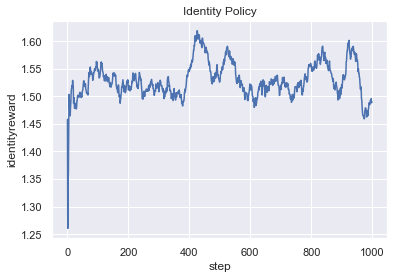

In [78]:
#  Plot Identity Reward

sns.lineplot(x="step", y="identityreward",
             data=df_identity_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean()).set(title='Identity Policy')

In [79]:
df_identity_policies.describe()

,identityreward
count,24000.000000
mean,1.530771
std,0.989886
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


##  Generate CSVs 

In [80]:
# df_identity_policies.head()

# df_identity_policies.groupby(['step']).mean().to_csv('data/identity-reward.csv')

df_identity_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean().to_csv('data/identity-reward-rolling-s10-v3.csv')

# Bond Imitating

In [81]:
def get_connections(simulation_user_id):
    connections = []
    for u,v in G.edges(simulation_user_id):
        connections.append(v)
    return(connections)

# connections = [1,2]
# df_identity_policies[0: 2*100].query('id in @connections').groupby(['context', 'identity_policy']).mean().reset_index()

def get_bond_policy(simulation_user_id, context, step):
    connections = get_connections(simulation_user_id)
    if step > 100 and len(df_bond_policies[0:(step-1)*100].query('id in @connections').groupby(['context', 'bondpolicy']).mean().reset_index().query('context == @context')) > 1:
        return(int(df_bond_policies[0:(step-1)*100].query('id in @connections').groupby(['context', 'bondpolicy']).mean().reset_index().query('context == @context').sort_values(by=['bondreward'], ascending=False).iloc[0]['bondpolicy']))
#     elif len(df_context_policies[0:(step-1)*100].groupby(['context', 'policy']).mean().reset_index().query('context == @context')) > 1:
#         return(int(df_context_policies[0:(step-1)*100].groupby(['context', 'policy']).mean().reset_index().query('context == @context').sort_values(by=['reward'], ascending=False).iloc[0]['policy']))
    else:
        return(get_user_policy(simulation_user_id, context, df_seed_privacy_policies)[0])

In [82]:
def get_bond_reward(simulation_user_id, context, tagged_users, step):
    reward = 0
    simulation_user_policy = get_bond_policy(simulation_user_id, context, step)

    for tagged_user_id in tagged_users:
        tagged_user_policy = get_bond_policy(tagged_user_id, context, step)
        policy_diff = simulation_user_policy - tagged_user_policy
        current_reward = 1 - 0.5 * abs(policy_diff)
        reward = reward + current_reward
    
    return(reward)

In [83]:
column_names = ['step', 'id', 'context', 'bondpolicy','tags','bondreward']
df_bond_policies  = pd.DataFrame(columns = column_names)


for index, row in df_context_policies.iterrows():
    row['bondpolicy'] = get_bond_policy(row['id'], row['context'], row['step'])
    row['bondreward'] = get_bond_reward(row['id'], row['context'], row['tags'], row['step'])
#     print(get_identity_policy(row['id'], row['context'], row['step']))
#     print(get_identity_reward(row['id'], row['context'], row['tags'], row['step']))
    df_bond_policies.loc[len(df_bond_policies)] = [row['step'], row['id'], row['context'], row['bondpolicy'], row['tags'], row['bondreward']]
    if index % 1000==0:
        print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


## Plot Bond Reward

[Text(0.5, 1.0, 'Bond Policy')]

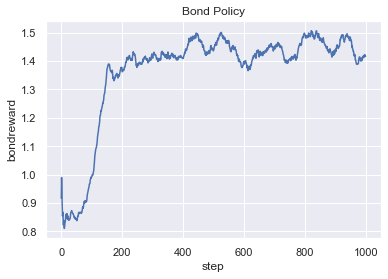

In [84]:
sns.lineplot(x="step", y="bondreward",
             data=df_bond_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean()).set(title='Bond Policy')

In [85]:
df_bond_policies.describe()

,bondreward
count,24000.000000
mean,1.378042
std,0.988117
min,-1.500000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


## Generate CSVs

In [86]:
# df_bond_policies.groupby(['step']).mean().to_csv('data/bond-reward.csv')

df_bond_policies.groupby(['step']).mean().rolling(50,min_periods=1).mean().to_csv('data/bond-reward-rolling-s10-v3.csv')

In [206]:

# LEARNING -- JUNK

import matplotlib.pyplot as plt  
#df_context_policies.shape
#df_context_policies.head

#X = df_context_policies.drop(['policy', 'step', 'id'], axis=1)  
X = df_context_policies.drop(['step','id','policy'], axis=1)  
y = df_context_policies['policy']

print(X)
print(y)

      context          tags  reward
0           2       [1, 34]     1.5
1           5           [0]     0.0
2          14       [99, 6]     1.0
3          16        [4, 6]     2.0
4          16     [3, 5, 8]     3.0
...       ...           ...     ...
23995       2          [16]     0.5
23996       7          [17]     0.0
23997       6      [26, 46]     3.5
23998       9  [20, 18, 17]     0.5
23999      11            []     0.0

[24000 rows x 3 columns]
0        4
1        3
2        4
3        1
4        1
        ..
23995    4
23996    3
23997    1
23998    4
23999    1
Name: policy, Length: 24000, dtype: object


In [15]:
from sklearn.model_selection import train_test_split  
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01) 


print(X_train, y_train)

      context
10672      13
7382        7
17406       6
14396      11
9196       14
...       ...
16667       3
20559      14
19668       1
16051       6
7339       14

[23760 rows x 1 columns] 10672    3
7382     1
17406    4
14396    1
9196     4
        ..
16667    3
20559    2
19668    4
16051    4
7339     3
Name: policy, Length: 23760, dtype: int64


In [19]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
# svclassifier.fit(X_train, y_train)  
svclassifier.fit(X, y)  

y_pred = svclassifier.predict(X_test)  


from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[117   0   0   0]
 [ 25   0   0   0]
 [ 50   0   0   0]
 [ 48   0   0   0]]
              precision    recall  f1-score   support

           1       0.49      1.00      0.66       117
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        50
           4       0.00      0.00      0.00        48

    accuracy                           0.49       240
   macro avg       0.12      0.25      0.16       240
weighted avg       0.24      0.49      0.32       240



/Users/niravajmeri/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
# d = {'id': [23, 22, 1], 'context': [4, 7, 1]}
d = {'context': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}
df = pd.DataFrame(data=d)
svclassifier.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
# G[0][4]['relation']

3